In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
contracts = pd.read_excel('Data contracts.xlsx')

# Exploring Data
First, let's take a look a the head of data:

In [27]:
contracts.head()

,shop_id,package_order_id,package_name,contract_date,start_date,end_date,real_end_date,Listing_limit,industry,category,region,city
0,35120,57868,Car C,2021-08-22,2021-09-06,2022-10-06,NaT,80,re_auto,خودرو,تهران,تهران
1,73135,55723,Car B,2021-06-08,2021-06-08,2022-07-15,NaT,50,re_auto,خودرو,تهران,تهران
2,28746,49014,Car C,2021-01-16,2021-01-16,2021-05-17,NaT,500,re_auto,خودرو,فارس,شیراز
3,76180,63743,Car C,2022-08-09,NaN,2023-02-08,NaT,10,re_auto,خودرو,آذربایجان شرقی,مراغه
4,63157,46291,Car B,2020-11-23,2020-11-23,2021-03-23,NaT,10,re_auto,خودرو,قم,قم


It would be wise to change farsi columns into English, but becasue of time limit, I ignore this step.

## Data Types

In [28]:
print(contracts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14419 entries, 0 to 14418
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   shop_id           14419 non-null  int64         
 1   package_order_id  14419 non-null  int64         
 2   package_name      14419 non-null  object        
 3   contract_date     14417 non-null  object        
 4   start_date        14418 non-null  object        
 5   end_date          14419 non-null  object        
 6   real_end_date     8 non-null      datetime64[ns]
 7   Listing_limit     14419 non-null  int64         
 8   industry          14419 non-null  object        
 9   category          14419 non-null  object        
 10  region            14416 non-null  object        
 11  city              14419 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 1.3+ MB
None


`contract_date`, `start_date`, and `end_date` should be transformed into datatime objects.

**NOTE:** There are missing values in columns contract_date, start_date, and region.

In [29]:
contracts['contract_date'] = pd.to_datetime(contracts['contract_date'])
contracts['start_date'] = pd.to_datetime(contracts['start_date'])
contracts['end_date'] = pd.to_datetime(contracts['end_date'])

Checking date columns again:

In [30]:
print(contracts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14419 entries, 0 to 14418
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   shop_id           14419 non-null  int64         
 1   package_order_id  14419 non-null  int64         
 2   package_name      14419 non-null  object        
 3   contract_date     14417 non-null  datetime64[ns]
 4   start_date        14418 non-null  datetime64[ns]
 5   end_date          14419 non-null  datetime64[ns]
 6   real_end_date     8 non-null      datetime64[ns]
 7   Listing_limit     14419 non-null  int64         
 8   industry          14419 non-null  object        
 9   category          14419 non-null  object        
 10  region            14416 non-null  object        
 11  city              14419 non-null  object        
dtypes: datetime64[ns](4), int64(3), object(5)
memory usage: 1.3+ MB
None


We have also categorical column like industry, category, region, and city. In case of necessity, those columns will be defined as categories later.

## Unique values of each column

In [31]:
print(contracts.nunique())

shop_id              8123
package_order_id    14417
package_name            9
contract_date        1186
start_date           1130
end_date             1549
real_end_date           7
Listing_limit          48
industry                2
category               11
region                 29
city                  282
dtype: int64


There are 8123 unqiue values of `shop_id`. Also, we have rows with the same `package_order_id`, which doesn't make a sense.

In [32]:
contracts[contracts.duplicated(subset='package_order_id', keep=False)].\
    sort_values('package_order_id')

,shop_id,package_order_id,package_name,contract_date,start_date,end_date,real_end_date,Listing_limit,industry,category,region,city
9828,14546,5660,General C,2019-07-20,2019-07-20,2019-10-21,NaT,5,re_auto,املاک,مازندران,آمل
11579,14546,5660,General C,2019-07-20,2019-07-20,2019-10-21,NaT,5,general,خدمات و کسب و کار,مازندران,آمل
280,74876,60314,Car B,2022-01-08,2022-01-08,2022-07-09,NaT,10,re_auto,خودرو,همدان,همدان
11651,74876,60314,Car B,2022-02-07,2022-01-08,2022-07-09,NaT,10,general,وسایل نقلیه,همدان,همدان


According to `industry` and `category` columns, these two orders are different from each other; however, their `shop_id`, `package_name`, `start_date` and `end_date` and even their `city` and `region` are identical!

There must be a mistake at data entry pipeline. Due to high uncertainty, all four rows are discarded from the following analysis.

In [33]:
contracts.drop_duplicates(subset='package_order_id', keep=False, inplace=True)

## Missing Values

In [34]:
missing_conditions = contracts['contract_date'].isna()|contracts['start_date'].isna()|contracts['region'].isna()
contracts[missing_conditions]

,shop_id,package_order_id,package_name,contract_date,start_date,end_date,real_end_date,Listing_limit,industry,category,region,city
3,76180,63743,Car C,2022-08-09,NaT,2023-02-08,NaT,10,re_auto,خودرو,آذربایجان شرقی,مراغه
10600,71562,53139,General A,2021-03-13,2021-03-13,2021-09-26,NaT,15,general,ورزشی ، تفریحی ، سرگرمی,NaN,تهران
11147,68825,48980,General B,2021-01-13,2021-01-13,2021-04-14,NaT,5,general,خدمات و کسب و کار,NaN,تهران
12884,68392,48821,General C,2021-01-06,2021-01-06,2021-05-07,NaT,30,general,استخدام,NaN,تهران
12955,76557,64920,General C,NaT,2022-10-26,2023-01-24,NaT,5,general,استخدام,تهران,شهریار
13769,76554,64903,General A,NaT,2022-10-26,2023-10-25,NaT,5,general,صنعتی و اداری و تجاری,سمنان,سمنان


NaT for date columns and NaN for other types are both standard ways of missingness indications.

## Month column

In [35]:
contracts['month'] = contracts['end_date'].dt.month
contracts['month'] = np.where(contracts['real_end_date'].notnull(),
                              contracts['real_end_date'].dt.month,
                              contracts['end_date'].dt.month)

Months found in this data set:

In [36]:
print(contracts['month'].unique())

[10.  7.  5.  2.  3.  4.  8.  1. 11. 12.  6.  9.]


**Let's do the calculation for the last three months of year (i.e. October, November, and December).**

# Renew and Return Rate Calculation

First, a new column represents any future `start_date` for a new contract:

In [37]:
contracts_sorted = contracts.sort_values(by = ['shop_id', 'start_date'])
contracts_sorted['start_date_next'] = contracts_sorted.groupby('shop_id')['start_date'].shift(-1)

Then, days between `end_date` of previous contract and `start_date` of new one is determined:

In [38]:
contracts_sorted['days_to_new'] = contracts_sorted['start_date_next'] - contracts_sorted['end_date']

# If real_end_date exists:
contracts_sorted['days_to_new'] = np.where(contracts_sorted['real_end_date'].notnull(), contracts_sorted['start_date_next'] - contracts_sorted['real_end_date'], contracts_sorted['days_to_new'])

contracts_sorted['days_to_new'] = contracts_sorted['days_to_new'].dt.days

A new column represents whether the conditions of renewal or return have been met:

In [39]:
# Renew
contracts_sorted['renew'] = contracts_sorted['days_to_new'] <= 30
# Return
contracts_sorted['return'] = contracts_sorted['days_to_new'] > 30

Let's filter only those rows that its `end_date` is within the last three months of year:

In [40]:
condition_months = contracts_sorted['month'].isin([10, 11, 12])
contracts_endseason = contracts_sorted[condition_months]

Last but not least, our interested rate are calculated:

In [41]:
renew_return_rates = contracts_endseason.groupby(['region', 'category', 'month'])['renew', 'return'].agg(lambda x: np.mean(x) * 100)
renew_return_rates = renew_return_rates.reset_index()

<ipython-input-41-3bcc78f42be6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  renew_return_rates = contracts_endseason.groupby(['region', 'category', 'month'])['renew', 'return'].agg(lambda x: np.mean(x) * 100)


Renaming columns:

In [42]:
renew_return_rates.rename(columns = {'renew':'renew_rate_perc', 'return':'return_rate_perc'},
                          inplace = True)

The dataframe is like the following:

In [43]:
renew_return_rates.head()

,region,category,month,renew_rate_perc,return_rate_perc
0,آذربایجان شرقی,املاک,10.0,40.0,20.0
1,آذربایجان شرقی,املاک,11.0,100.0,0.0
2,آذربایجان شرقی,املاک,12.0,20.0,10.0
3,آذربایجان شرقی,خدمات و کسب و کار,11.0,100.0,0.0
4,آذربایجان شرقی,خدمات و کسب و کار,12.0,50.0,0.0


# Renew and Return Rate Visualization

## Renew Rate Histogram

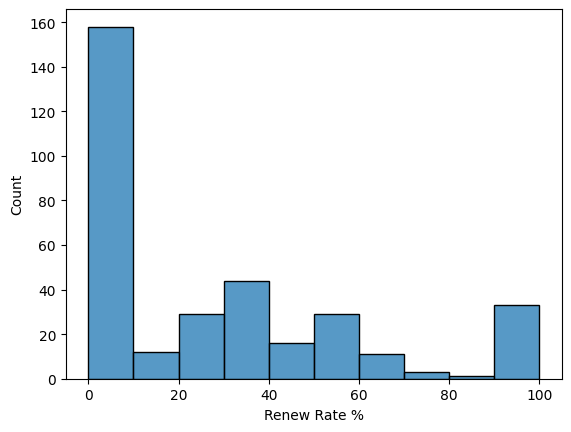

In [44]:
sns.histplot(x = 'renew_rate_perc', data = renew_return_rates)
plt.xlabel('Renew Rate %')
plt.show()

## Return Rate Histogram

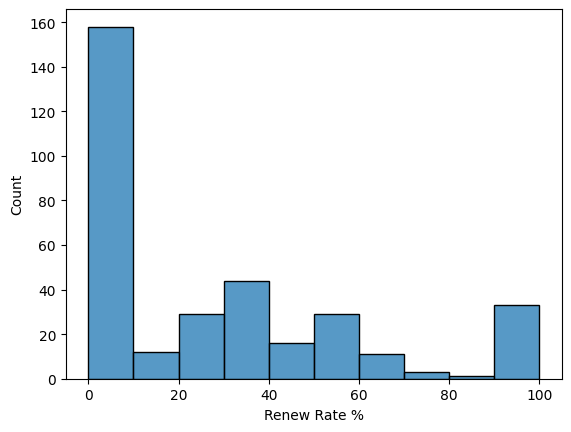

In [45]:
sns.histplot(x = 'renew_rate_perc', data = renew_return_rates)
plt.xlabel('Renew Rate %')
plt.show()

## Difference Between Renew and Return Rates Distribution

In [47]:
pivoted_renew_return = pd.melt(renew_return_rates,
                               id_vars=['region', 'category', 'month'],
                               var_name = 'renew_return', value_name='percent')

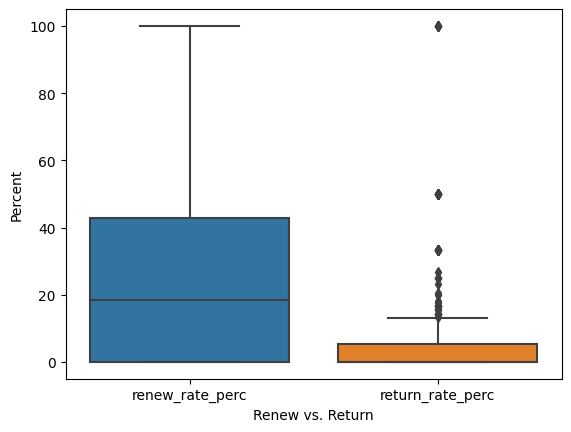

In [48]:
sns.boxplot(x = 'renew_return', y = 'percent', data = pivoted_renew_return)
plt.xlabel('Renew vs. Return')
plt.ylabel('Percent')
plt.show()

Clearly, the longer it takes since the last contract, the higher the probability of customer churn.

It's not implied what percentage rates should be considered low so a wise thing to do is to use quartiles of its distribution.

In [49]:
renew_quartiles = np.quantile(renew_return_rates['renew_rate_perc'], q = [0.25, 0.5, 0.75])

print(f'The first quartile of renew distribution is: {renew_quartiles[0]:.2f}')
print(f'The second quartile (median) of renew distribution is: {renew_quartiles[1]:.2f}')
print(f'The third quartile of renew distribution is: {renew_quartiles[2]:.2f}')

The first quartile of renew distribution is: 0.00
The second quartile (median) of renew distribution is: 18.47
The third quartile of renew distribution is: 42.98


## Renew Across Regions

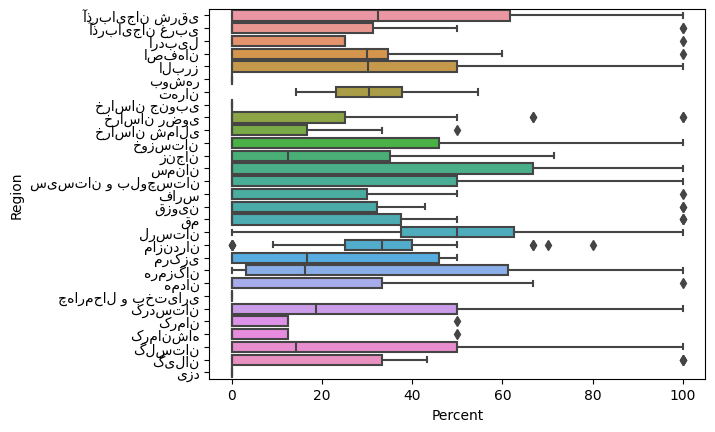

In [50]:
sns.boxplot(x = 'renew_rate_perc', y = 'region', data = renew_return_rates)
plt.xlabel('Percent')
plt.ylabel('Region')
plt.show()

**Regions with lowest renewal rates are:<br>
Booshehr, Khorasan Jonubi, Charmahal Bakhtiari, Yazd, Kerman, Kermanshah, and Khorasan Shomali**

## Renew Across Category

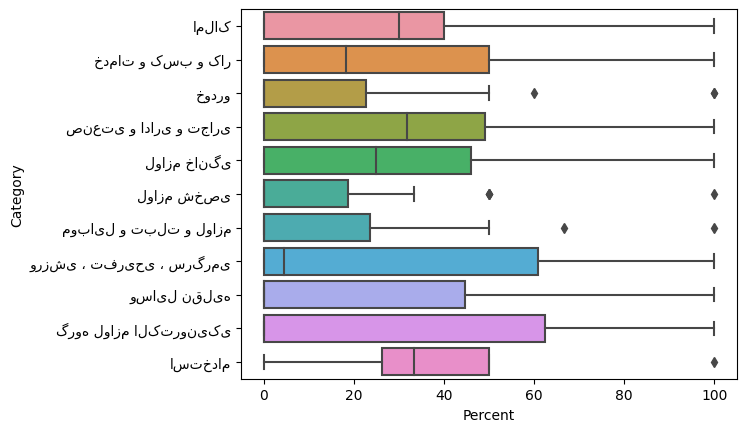

In [51]:
sns.boxplot(x = 'renew_rate_perc', y = 'category', data = renew_return_rates)
plt.xlabel('Percent')
plt.ylabel('Category')
plt.show()

**Categories with lowest renewal rates are:<br>
Khodro, Lavazem shakhsi, and Mobile-tablet.**

Let's use the remaining information from the initial data set.

In [53]:
# package_name, listing_limit, and industry table
contracts_dummies = pd.concat([contracts[['region', 'category', 'month','Listing_limit']], pd.get_dummies(contracts['package_name']), pd.get_dummies(contracts['industry'])], axis=1)

contracts_dummies = contracts_dummies.groupby(['region', 'category', 'month']).mean().reset_index()
contracts_dummies = contracts_dummies[contracts_dummies['month'].isin([10, 11, 12])]

merged_df = renew_return_rates.merge(contracts_dummies, how='inner', on = ['region', 'category', 'month'])

## Renew vs. Car Industry Packages

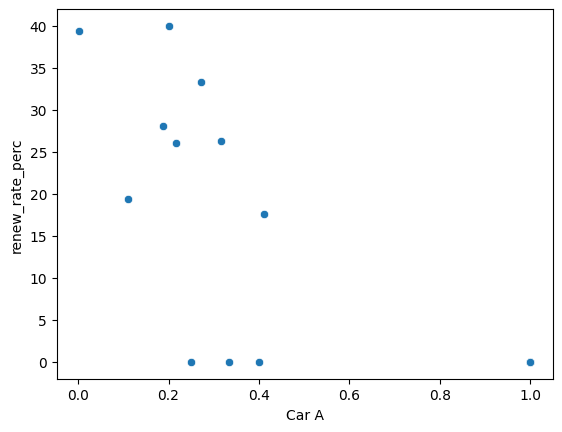

In [54]:
sns.scatterplot(x = 'Car A', y = 'renew_rate_perc', data = merged_df[merged_df['Car A'] != 0])
plt.show()

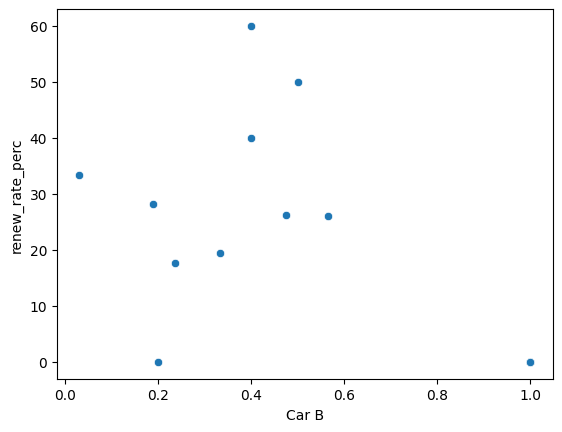

In [55]:
sns.scatterplot(x = 'Car B', y = 'renew_rate_perc', data = merged_df[merged_df['Car B'] != 0])
plt.show()

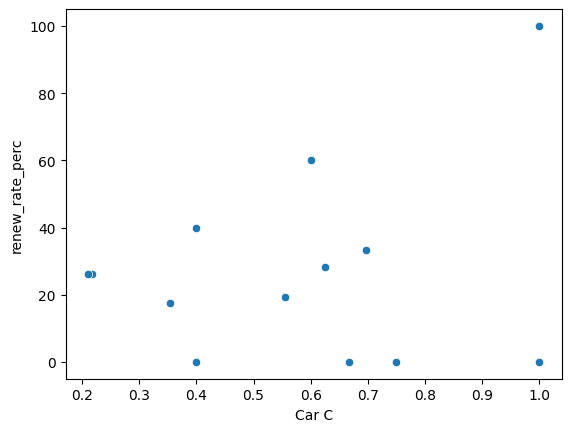

In [56]:
sns.scatterplot(x = 'Car C', y = 'renew_rate_perc', data = merged_df[merged_df['Car C'] != 0])
plt.show()

It seems those regions and categories with higher A package offerings have slightly higher rates. In Package C type, the relationship is reversed.

## Renew vs. General Industry

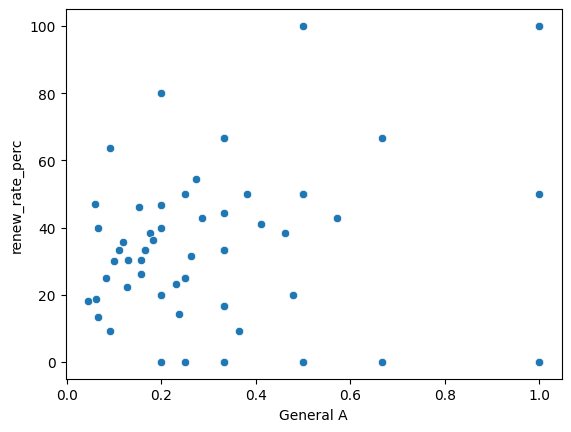

In [57]:
sns.scatterplot(x = 'General A', y = 'renew_rate_perc', data = merged_df[merged_df['General A'] != 0])
plt.show()

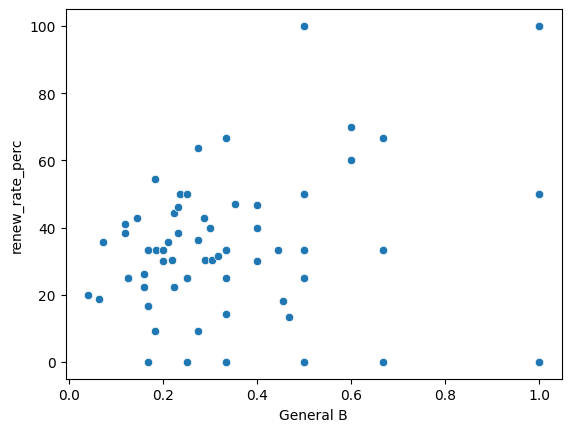

In [58]:
sns.scatterplot(x = 'General B', y = 'renew_rate_perc', data = merged_df[merged_df['General B'] != 0])
plt.show()

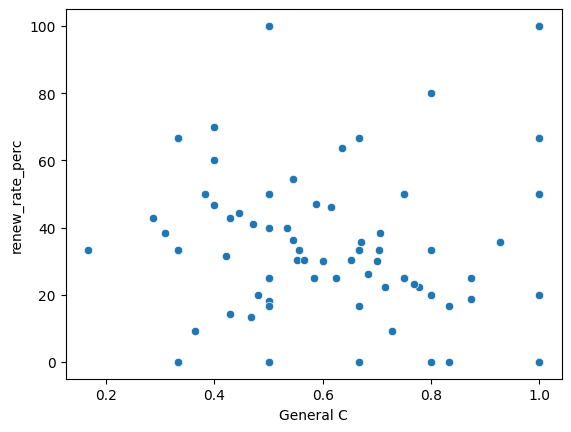

In [59]:
sns.scatterplot(x = 'General C', y = 'renew_rate_perc', data = merged_df[merged_df['General C'] != 0])
plt.show()

Packages A and B have led to higher rates of renewal.

## Renew vs. Real Estate

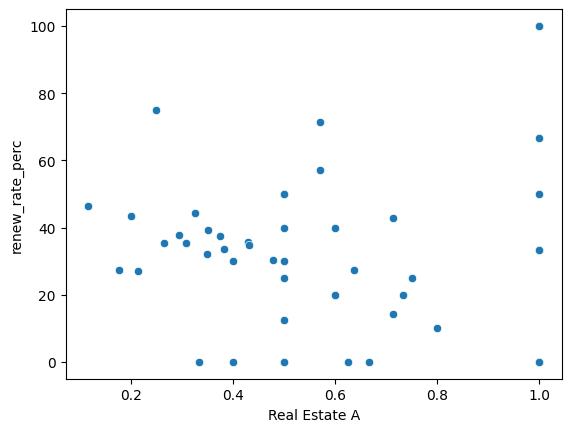

In [60]:
sns.scatterplot(x = 'Real Estate A', y = 'renew_rate_perc', data = merged_df[merged_df['Real Estate A'] != 0])
plt.show()

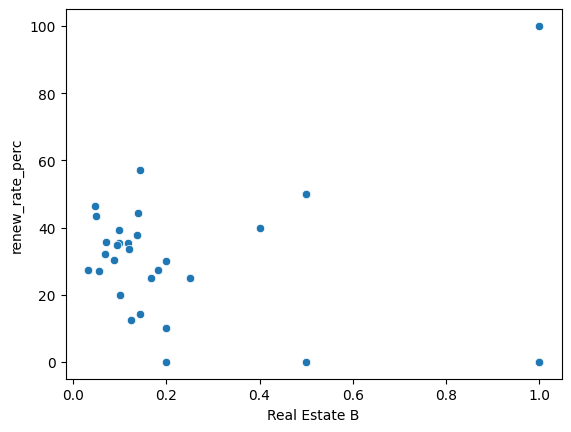

In [61]:
sns.scatterplot(x = 'Real Estate B', y = 'renew_rate_perc', data = merged_df[merged_df['Real Estate B'] != 0])
plt.show()

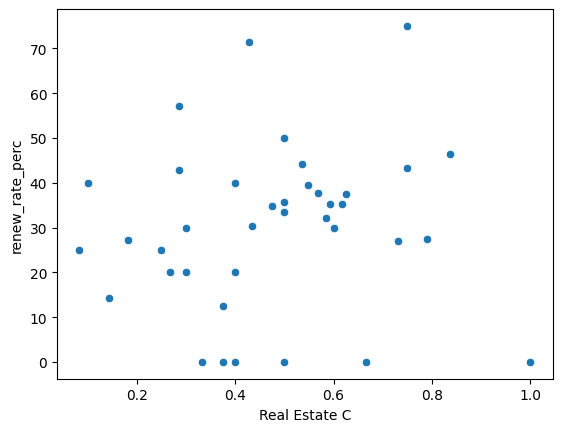

In [62]:
sns.scatterplot(x = 'Real Estate C', y = 'renew_rate_perc', data = merged_df[merged_df['Real Estate C'] != 0])
plt.show()

Here, package B doesn't perfom well!

## Renew throughout Months

In [63]:
renew_return_rates

,region,category,month,renew_rate_perc,return_rate_perc
0,آذربایجان شرقی,املاک,10.0,40.0,20.0
1,آذربایجان شرقی,املاک,11.0,100.0,0.0
2,آذربایجان شرقی,املاک,12.0,20.0,10.0
3,آذربایجان شرقی,خدمات و کسب و کار,11.0,100.0,0.0
4,آذربایجان شرقی,خدمات و کسب و کار,12.0,50.0,0.0
...,...,...,...,...,...
331,گیلان,وسایل نقلیه,11.0,0.0,0.0
332,گیلان,وسایل نقلیه,12.0,0.0,0.0
333,گیلان,گروه لوازم الکترونیکی,12.0,0.0,0.0
334,یزد,خودرو,12.0,0.0,0.0


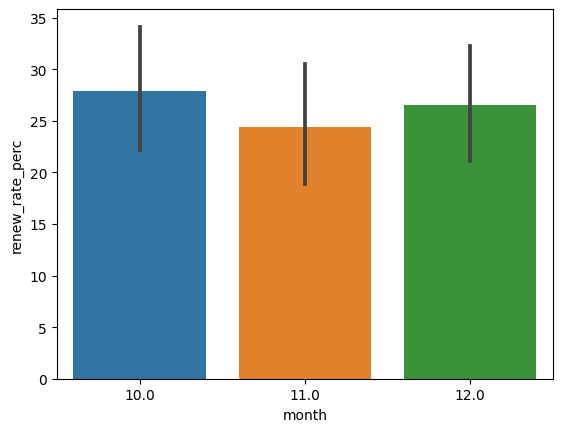

In [65]:
sns.barplot(x = 'month', y = 'renew_rate_perc', data = renew_return_rates)
plt.show()

Renew rates are not so different from each other throughout months.

# Practical Suggestions

## More Customized Packages

It's likely that packages offered to customers in specific regions are not attractive enough and they decide not to continue. Features can be reconsidered, especially in those regions with low economic power, more economical packages should be designed.

## Changing Underperformed Packages

Some packages that have been detected before are not doing a decent job. Making a survey and sending to those who have used packages and decided not to continue let us know their problems.

## Pay More Attention to Category

Our company has some issues in some categories like Khodro, Lavazem shakhsi, and Mobile-tablet. One way to improve offerings at these categories is to conduct in-depth interviews or even just making a short contact to get more insights what are the critical factors for they managers.

## Retention Programs

The company should attempt to persuade its customers within 30 days. If it takes more than that, the probability of churning rises significantly. Sending emails to remind the manager what are the benefits of working with us and its costs could be beneficial. Also, give them some promotional benefits might turn them into loyal customers.